In [1]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import tensorflow_probability as tfp

In [2]:
binary_policy = tfp.distributions.Bernoulli(probs=0.5)
for i in range(5):
    action = binary_policy.sample(1)
    print("Action: ", action)

Action:  tf.Tensor([0], shape=(1,), dtype=int32)
Action:  tf.Tensor([1], shape=(1,), dtype=int32)
Action:  tf.Tensor([0], shape=(1,), dtype=int32)
Action:  tf.Tensor([1], shape=(1,), dtype=int32)
Action:  tf.Tensor([0], shape=(1,), dtype=int32)


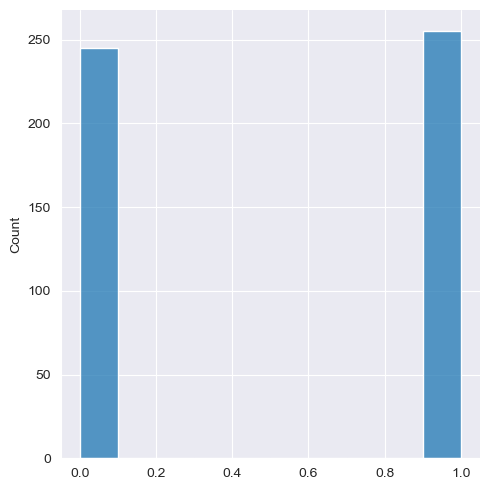

In [3]:
sample_actions = binary_policy.sample(500)
sns.displot(sample_actions)

tf.Tensor([[0. 0. 1. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 1.]], shape=(1, 4), dtype=float32)
tf.Tensor([[1. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[1. 0. 0. 0.]], shape=(1, 4), dtype=float32)


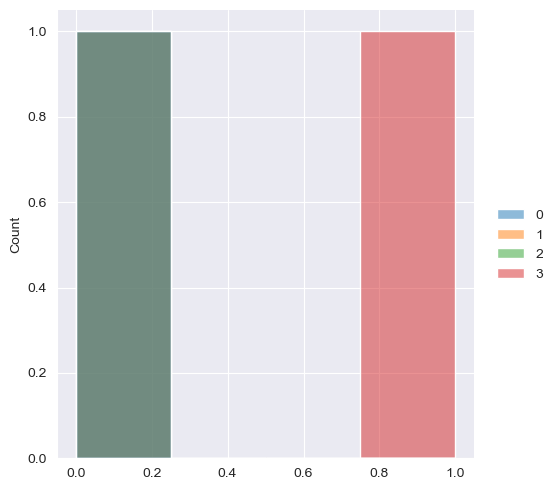

In [7]:
action_dim = 4  # Dimension of the discrete action space
action_probability = [0.25, 0.25, 0.25, 0.25]
discrete_policy = tfp.distributions.Multinomial(
    probs=action_probability, total_count=1)
for i in range(5):
    action = discrete_policy.sample(1)
    print(action)
sns.displot(discrete_policy.sample(1).numpy())

In [8]:
def entropy(action_probs):
    return -tf.reduce_sum(action_probs * tf.math.log(action_probs), axis=-1)  #数学表达：H(p) = -Σp(x)log(p(x))


action_probability = [0.25, 0.25, 0.25, 0.25]
print(entropy(action_probability))

tf.Tensor(1.3862944, shape=(), dtype=float32)


In [9]:
class DiscretePolicy(object):
    def __init__(self, num_actions):
        self.action_dim = num_actions

    def sample(self, action_logits):
        self.distribution = tfp.distributions.Multinomial(
            logits=action_logits, total_count=1)
        return self.distribution.sample(1)

    def get_action(self, action_logits):
        action = self.sample(action_logits)
        return np.where(action)[-1]

    def entropy(self, action_probability):
        return -tf.reduce_sum(action_probability * tf.math.log(action_probability), axis=-1)

In [11]:
def evaluate(agent, env, render=True):
    global info
    obs, episode_reward, done, step_num = env.reset(), 0.0, False, 0
    while not done:
        action = agent.get_action(obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        step_num += 1
        if render:
            env.render()
    return episode_reward, step_num, done, info

In [ ]:
class Brain(keras.Model):
    